In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt
from datetime import datetime, date
#plt.style.use(['science', 'notebook'])
%matplotlib inline

### Ce fichier est mis à jour par weather_bis.py sur pi4 dans terminal


In [314]:

csv_file1 = r"Y:\Documents\temp16122022.csv.old"
csv_file1 = r"Y:\Documents\temp03062024.csv"
csv_file2 = r"Z:\Documents\temp16122022.csv"


In [315]:

def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)


def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data

try:
    data = get_data(csv_file1)
except:
    data = get_data(csv_file2)
#data['heure'] = pd.to_datetime(data['time']).dt.strftime('%H:%M') #time
#data['jour'] = pd.to_datetime(data['time']).dt.strftime('%d/%m') #date
len(data)
data

,temp
0,13.19
1,12.20
2,12.29
3,12.42
4,14.54
...,...
2398,18.41
2399,18.21
2400,17.60
2401,17.68


<Axes: >

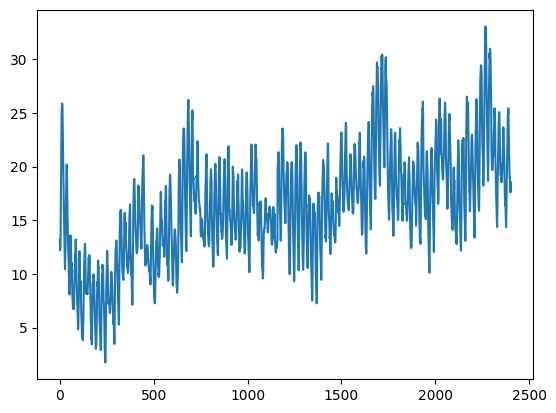

In [316]:
data['temp'].plot()

In [317]:
# convert string to datetime
date_time_str = '03/06/24 06:00:00'
ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
ref

datetime.datetime(2024, 6, 3, 6, 0)

In [318]:
then = ref + dt.timedelta(hours=len(data))
ref,then

(datetime.datetime(2024, 6, 3, 6, 0), datetime.datetime(2024, 9, 11, 9, 0))

In [319]:
len(data)

2403

In [320]:
date_time_str

'03/06/24 06:00:00'

In [321]:
def mk_date(date_time_str,data):
    # 
    ref = datetime.strptime(date_time_str, '%d/%m/%y %H:%M:%S')
    then = ref + dt.timedelta(hours=len(data))
    return mdates.drange(ref,then,dt.timedelta(hours=1))

In [322]:
hours = mk_date(date_time_str,data)
hours
#len(hours)

array([19877.25      , 19877.29166667, 19877.33333333, ...,
       19977.25      , 19977.29166667, 19977.33333333])

In [323]:
dates = [datetime.strftime(h, '%d/%m/%y %H:%M:%S') for h in mdates.num2date(hours)]
#dates

In [324]:
if len(data)<len(hours):
    data['hours']=hours[:-1]
    data['dates']=dates[:-1]
else:
    data['hours']=hours
    data['dates']=dates

In [325]:
data[['dates','temp']]

,dates,temp
0,03/06/24 06:00:00,13.19
1,03/06/24 07:00:00,12.20
2,03/06/24 08:00:00,12.29
3,03/06/24 09:00:00,12.42
4,03/06/24 10:00:00,14.54
...,...,...
2398,11/09/24 04:00:00,18.41
2399,11/09/24 05:00:00,18.21
2400,11/09/24 06:00:00,17.60
2401,11/09/24 07:00:00,17.68


In [326]:
import warnings
warnings.filterwarnings("ignore")


In [327]:
temp= np.array(data['temp'])
len(temp)
#type(temp)
data,len(data)

(       temp         hours              dates
 0     13.19  19877.250000  03/06/24 06:00:00
 1     12.20  19877.291667  03/06/24 07:00:00
 2     12.29  19877.333333  03/06/24 08:00:00
 3     12.42  19877.375000  03/06/24 09:00:00
 4     14.54  19877.416667  03/06/24 10:00:00
 ...     ...           ...                ...
 2398  18.41  19977.166667  11/09/24 04:00:00
 2399  18.21  19977.208333  11/09/24 05:00:00
 2400  17.60  19977.250000  11/09/24 06:00:00
 2401  17.68  19977.291667  11/09/24 07:00:00
 2402  18.55  19977.333333  11/09/24 08:00:00
 
 [2403 rows x 3 columns],
 2403)

In [328]:
# data des 24 premieres heures
d_24 = data[:24]['temp']
#d_24


In [329]:
# moyenne des premieres 24 heures
m_day = d_24.mean()
m_day

19.400000000000016

In [330]:
# moyenne sur 24 heures depuis le 16/12/2022 9h
mean_all = []
window = 24
h_w = window//2
for l in range(len(data)-window):
    d_24 = data[l:l+window]['temp'].mean()
    mean_all.append(d_24)
x = data[:-window]['hours'].values    
len(mean_all)

2379

In [331]:
len(x)

2379

In [332]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))  #('%d/%m\n%H:%M'))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

Text(0.5, 1.0, 'Moyenne sur 24 heures sur 7 jours')

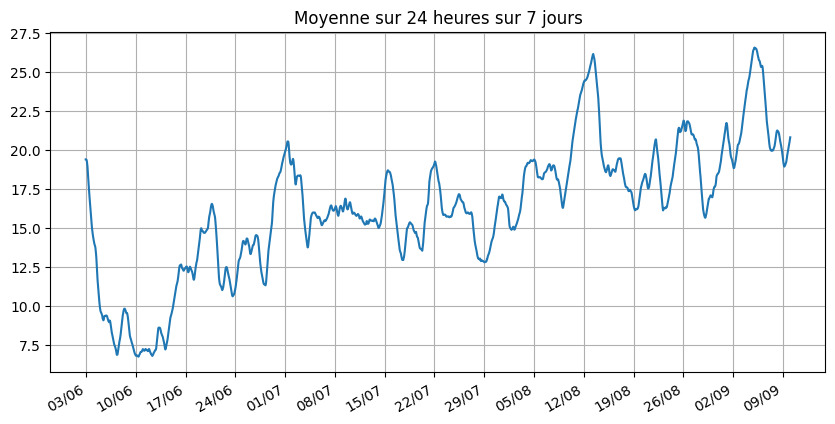

In [333]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(x,mean_all, markersize=1)
jours = 7
format_date(jours*24) #10 jours x 24 h
plt.title(f'Moyenne sur 24 heures sur {jours} jours') #depuis le 16/12/2022')
#plt.grid()

In [334]:
today = datetime.now()
diff = today - ref
diff

datetime.timedelta(days=52, seconds=8668, microseconds=78042)

In [335]:
days = diff.days + diff.seconds/(24*3600)
days = int(days)


In [336]:
# moyenne depuis le 16/12/22
slice = int(days*24)
h = data.tail(slice).hours
t = data.tail(slice).temp
#h, t
ref,today,days


(datetime.datetime(2024, 6, 3, 6, 0),
 datetime.datetime(2024, 7, 25, 8, 24, 28, 78042),
 52)

In [337]:
moyenne = data['temp'].mean()
moyenne

16.297994173949252

16.297994173949252

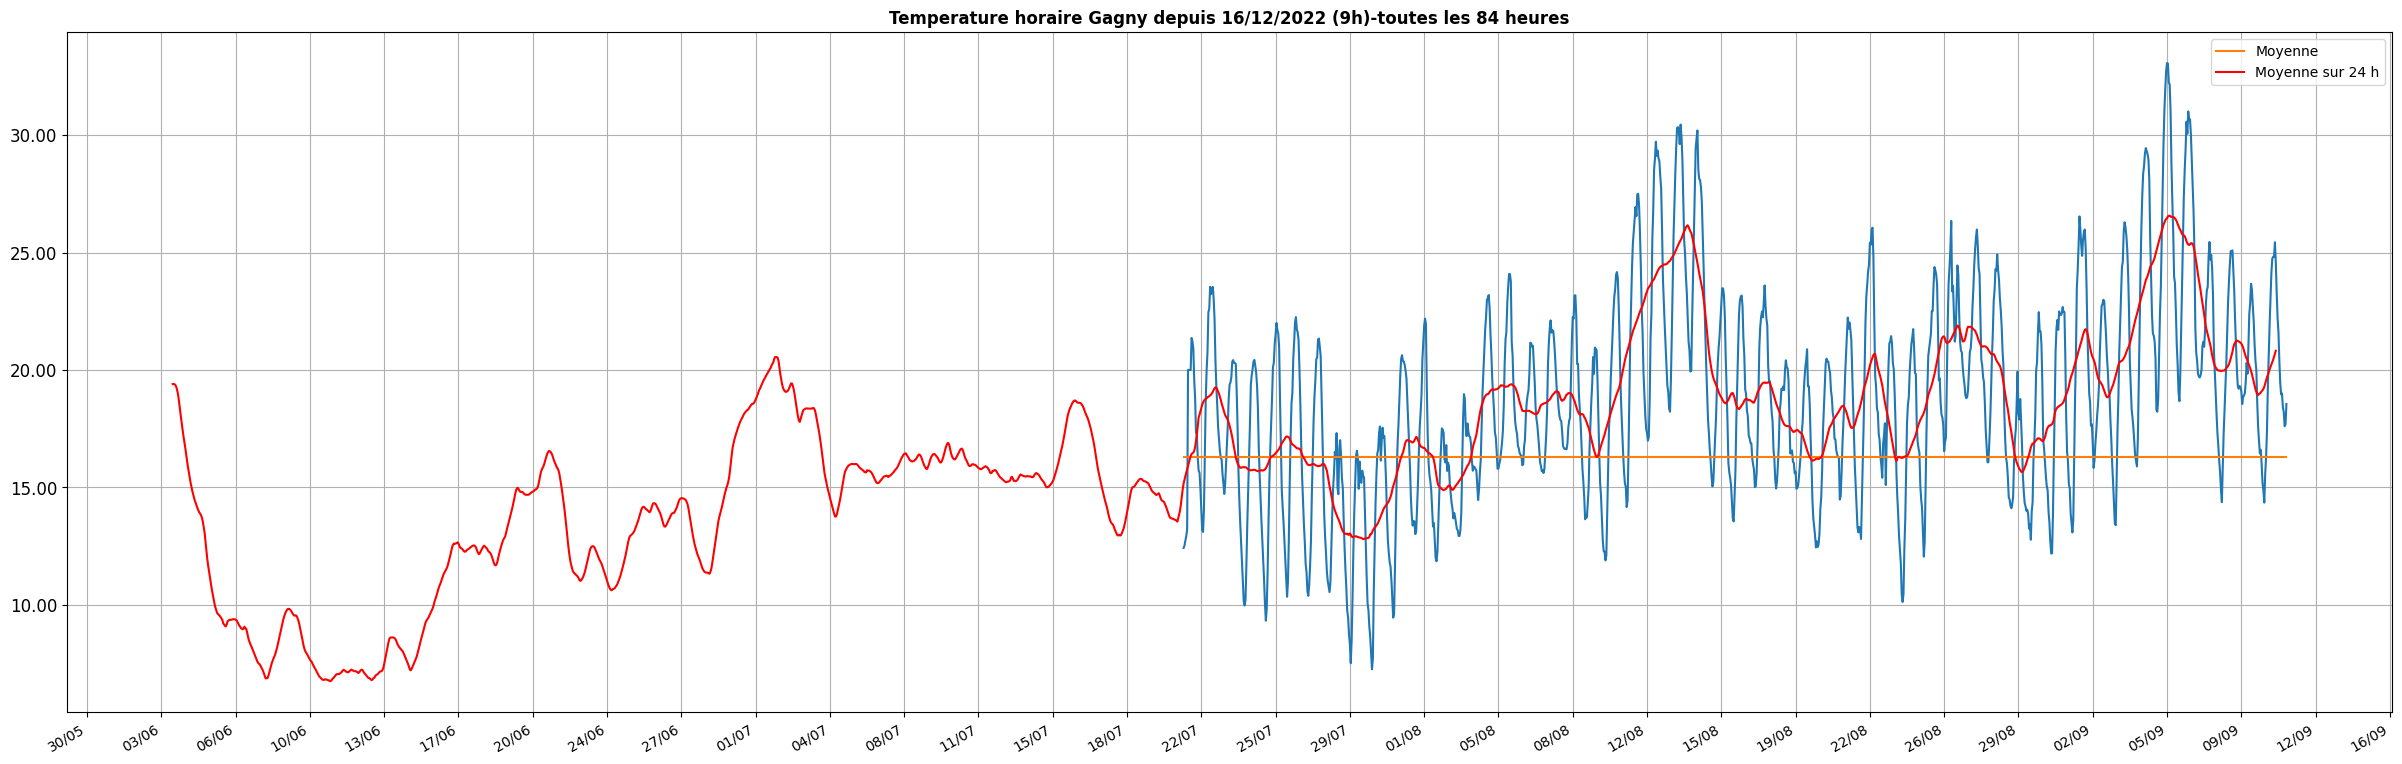

In [338]:
interval = 84
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
#plot = data['temp'].plot(figsize=(12,6))
plt.plot(h,t)
h1 = h.head(1)
h2 = h.tail(1)
plt.plot((h1,h2),(moyenne, moyenne),label='Moyenne')
plt.plot(hours[h_w:len(data)-h_w],mean_all,'r-',label=f'Moyenne sur {window} h')
#plt.plot(hours,temp)
plt.title(f"Temperature horaire Gagny depuis 16/12/2022 (9h)-toutes les {interval} heures",fontweight ='bold')


plt.legend()
#ax.set_xticks(hours)
ax.set_xticklabels(hours,fontsize=10)
#ax.set_yticks()
ax.set_yticklabels(temp,fontsize=12)

# Y_axis
formatter = ticker.FormatStrFormatter('%1.2f')
Axis.set_major_formatter(ax.yaxis, formatter)
format_date(84)
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m:%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=interval))
# plt.gcf().autofmt_xdate()
# plt.grid()
moyenne


In [339]:
data['variation']=data['temp'].diff()
data

,temp,hours,dates,variation
0,13.19,19877.250000,03/06/24 06:00:00,NaN
1,12.20,19877.291667,03/06/24 07:00:00,-0.99
2,12.29,19877.333333,03/06/24 08:00:00,0.09
3,12.42,19877.375000,03/06/24 09:00:00,0.13
4,14.54,19877.416667,03/06/24 10:00:00,2.12
...,...,...,...,...
2398,18.41,19977.166667,11/09/24 04:00:00,-0.59
2399,18.21,19977.208333,11/09/24 05:00:00,-0.20
2400,17.60,19977.250000,11/09/24 06:00:00,-0.61
2401,17.68,19977.291667,11/09/24 07:00:00,0.08


<Axes: >

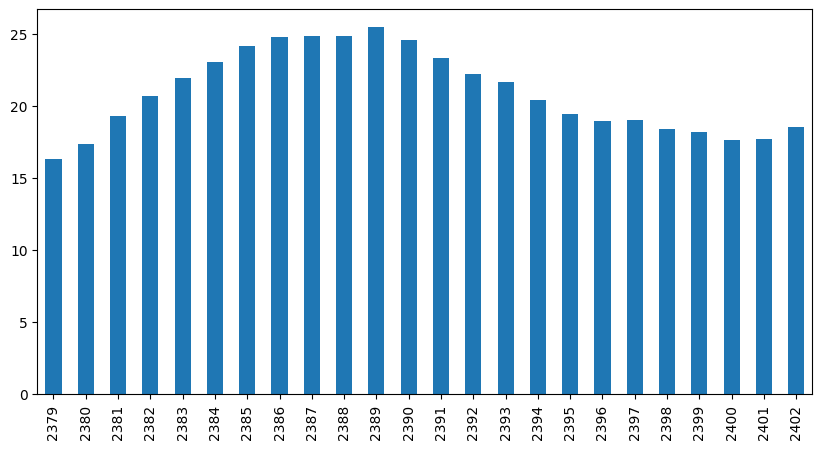

In [340]:
data.tail(24)['temp'].plot.bar(figsize=(10,5))

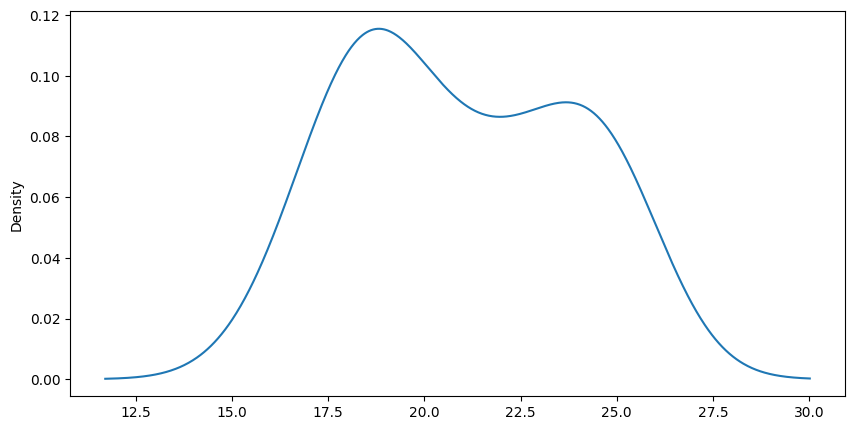

In [341]:
try:
    data.tail(24)['temp'].plot.kde(figsize=(10,5))
except:
    pass

<Axes: ylabel='Frequency'>

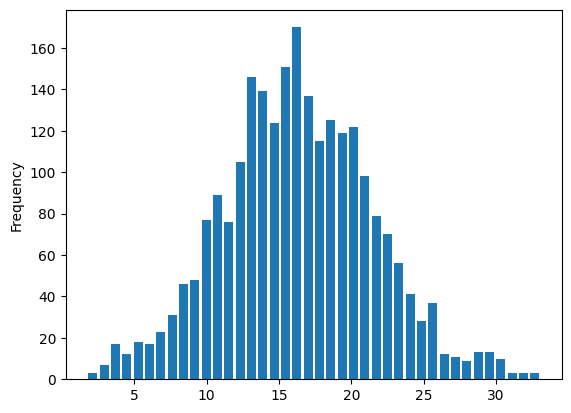

In [342]:
data['temp'].plot.hist(bins=40,rwidth=0.8) #,histtype='step')


<Axes: ylabel='Density'>

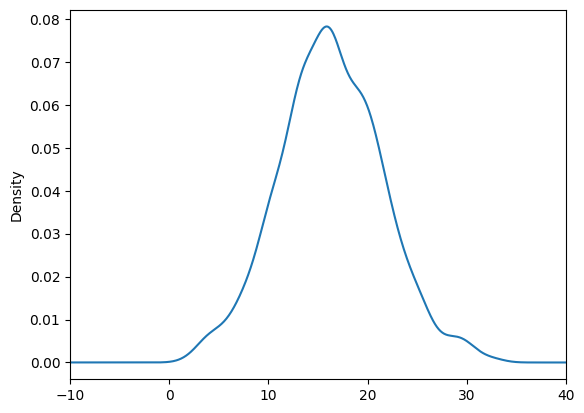

In [343]:
data['temp'].plot.kde(xlim=(-10,40)) #,logy=True)

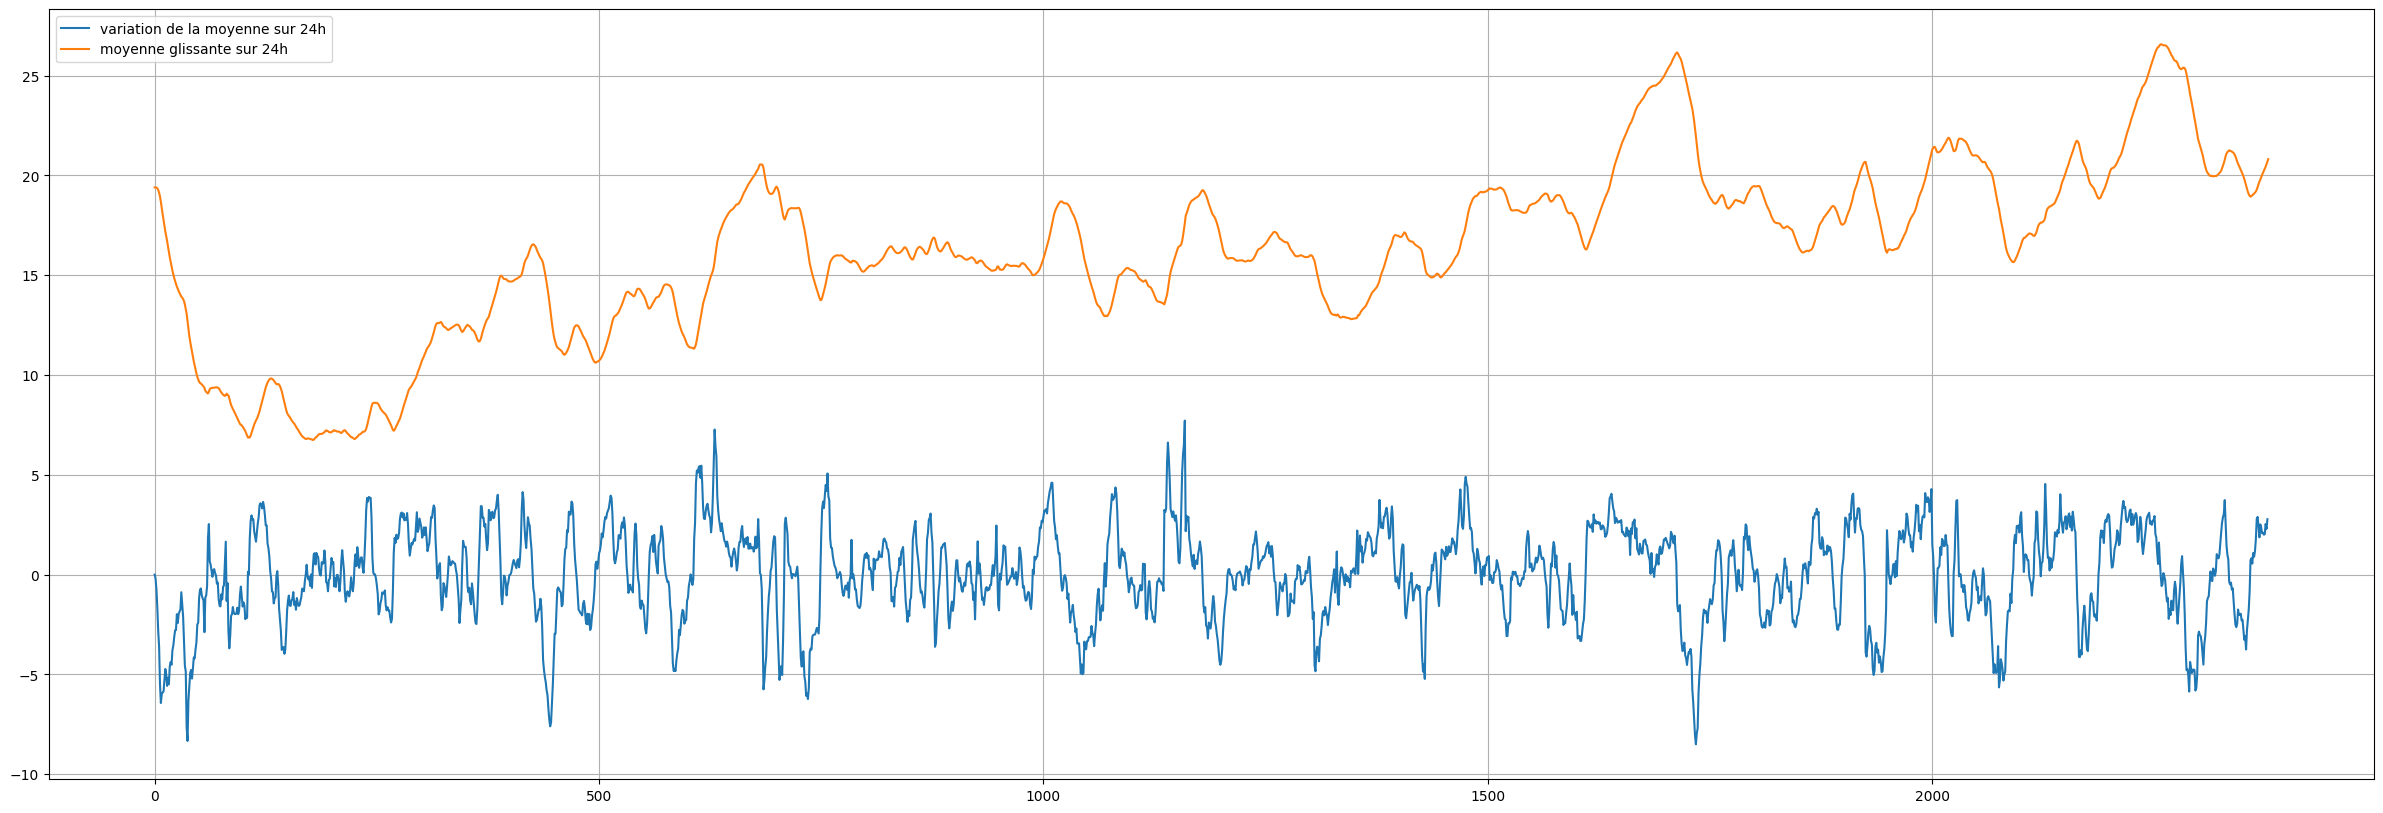

In [344]:
# variation horaire
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
delta = np.diff(mean_all)
facteur = 20   # amplifie la variation delta
plt.plot(facteur*delta,label='variation de la moyenne sur 24h')
plt.plot(mean_all,label='moyenne glissante sur 24h')
plt.legend()
plt.grid()

## Définir une fenêtre de visualisation : days

In [345]:
# fenetre de visualisation
days = 15
#days = int(len(data)/24)  # sur toute la liste de data


# xAxis interval
if days>30:
    interval = 72
elif days>15:
    interval = 24
elif days>7:
    interval = 12
else:
    interval = 6


In [346]:
window, days, interval

(24, 15, 12)

In [347]:
# moyenne avec une fenetre de 24h (window) calculé sur le nombre de jours=days 
mean_days = []
max_days = []
min_days = []
ecart_days = []

slice = int(days*24) # last days
#hours[-slice:],temp[-slice:]
h = data.tail(slice).hours
t = data.tail(slice).temp
#h.iloc[0]
start = datetime.now() - dt.timedelta(days=days)
window_start = start.strftime("%d/%m/%Y, %H:%M:%S")

#window = 24
#h_w = int(window/2)
for l in range(len(t)-window):
    d_24 = t[l:l+window].mean()
    M_24 = t[l:l+window].max()
    m_24 = t[l:l+window].min()
    mean_days.append(d_24)
    max_days.append(M_24)
    min_days.append(m_24)
    ecart_days.append(M_24-m_24)
moyenne = t.mean()
#moyenne  # moyenne sur la fenetre de visualisation
len(h[:-24]),len(max_days), len(min_days),len(ecart_days),window

(336, 336, 336, 336, 24)

In [348]:
h

2043    19962.375000
2044    19962.416667
2045    19962.458333
2046    19962.500000
2047    19962.541667
            ...     
2398    19977.166667
2399    19977.208333
2400    19977.250000
2401    19977.291667
2402    19977.333333
Name: hours, Length: 360, dtype: float64

In [349]:
 datetime.now()

datetime.datetime(2024, 7, 25, 8, 24, 32, 968215)

In [350]:
window_start

'10/07/2024, 08:24:32'

In [351]:
def select(days):
    # moyenne sur la fenetre days
    mean_days = []
    max_days = []
    min_days = []
    ecart_days = []
    # fenetre de visualisation
    #days = int(len(data)/24)  # sur toute la liste de data
    #days = 30
    slice = int(days*24) # last days
    #hours[-slice:],temp[-slice:]
    h = data.tail(slice).hours
    t = data.tail(slice).temp
    #h.iloc[0]
    #start = datetime.now() - dt.timedelta(days=days)
    #window_start = start.strftime("%d/%m/%Y, %H:%M:%S")
    
    #window = 24
    #h_w = int(window/2)
    for l in range(len(t)-window):
        d_24 = t[l:l+window].mean()
        M_24 = t[l:l+window].max()
        m_24 = t[l:l+window].min()
        ecart_days.append(M_24 - m_24)
        mean_days.append(d_24)
        max_days.append(M_24)
        min_days.append(m_24)
    moyenne = t.mean()
    #moyenne  # moyenne sur la fenetre de visualisation
    return mean_days,max_days,min_days,ecart_days,moyenne


mean_d,max_d,min_d,ecart_d,moyenne = select(days)
moyenne

20.798194444444466

In [352]:
mean_d,max_d,min_d,ecart_d,moyenne = select(15)
len(mean_d),moyenne

(336, 20.798194444444466)

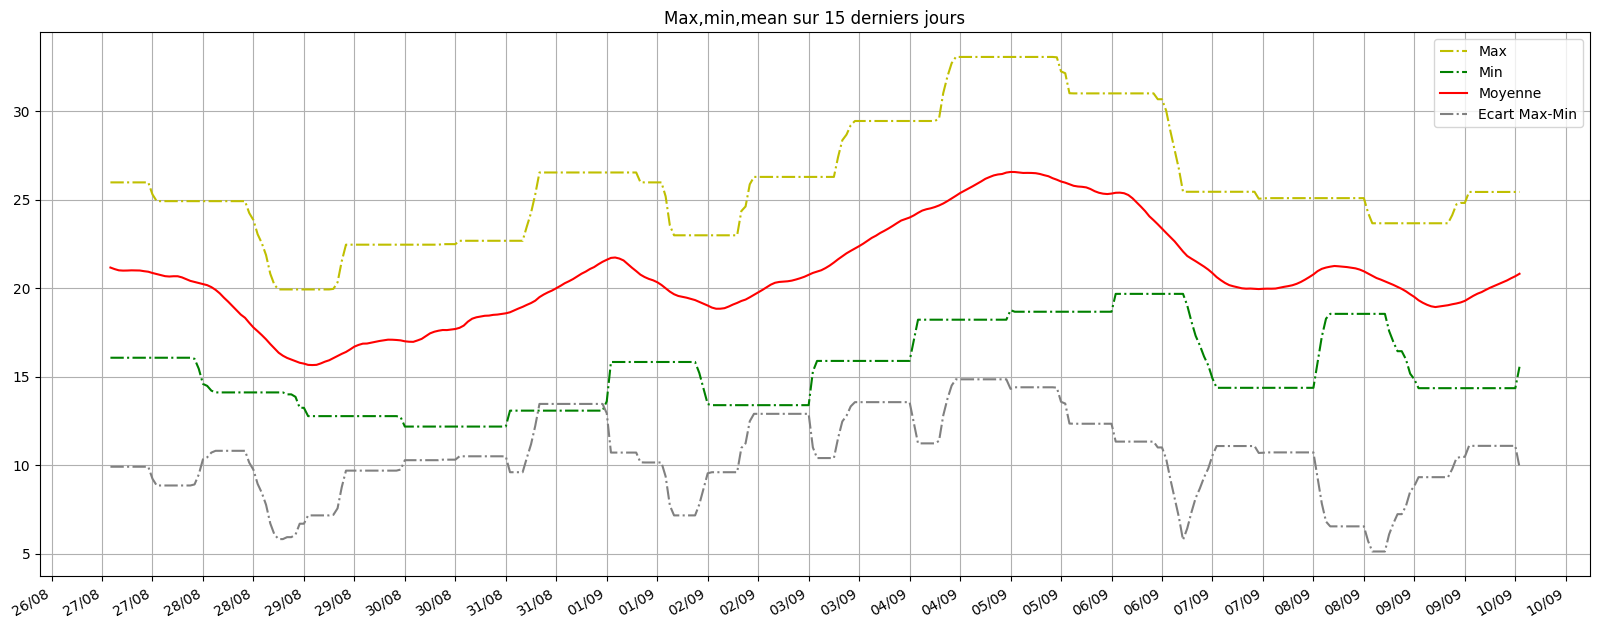

In [353]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20, 8)
x = h[:-24]
plt.title(f"Max,min,mean sur {days} derniers jours")
plt.plot(x,max_days,"y-.",label="Max")
plt.plot(x,min_days,"g-.",label="Min")
plt.plot(x,mean_days,'r',label="Moyenne")
plt.plot(x,ecart_days,'-.',color='grey',label="Ecart Max-Min")
#plt.plot(t[l:l+window])
format_date(interval)
plt.legend()

In [354]:
#delta = [j-i for i, j in zip(mean_week[:-1], mean_week[1:])]
delta = np.diff(mean_days)
#delta

## Delta/days des moyennes 24h avec un glissement d'une heure

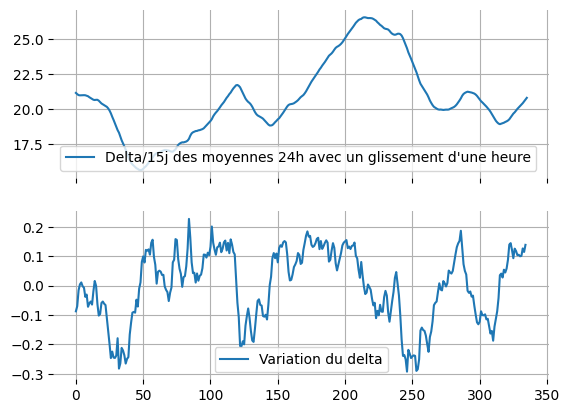

In [355]:
#fig,ax =plt.subplots(nrows=2)
#fig,ax =plt.subplots(nrows=2, sharex=True)
fig,ax =plt.subplots(nrows=2, sharex=True, subplot_kw=dict(frameon=False))
ax[0].plot(mean_days,label='Delta/'+str(days)+'j des moyennes 24h avec un glissement d\'une heure')
ax[1].plot(delta,label=('Variation du delta'))
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()


In [356]:
def local_min_max(liste):
    """
    Trouve les minima et maxima locaux d'une liste.

    Args:
    liste: La liste à analyser.

    Returns:
    Les listes max et min.
    """

    max = []
    min = []

    if liste[0] > liste[1]:
        max.append(liste[0])
    elif liste[0] <= liste[1] :
        min.append(liste[0])

    for i in range(1, len(liste) - 1):
        if liste[i] > liste[i - 1] and liste[i] >= liste[i + 1]:
            max.append(liste[i])
        elif liste[i] <= liste[i - 1] and liste[i] < liste[i + 1]:
            min.append(liste[i])

    return max, min


liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
max, min = local_min_max(liste)

max,min

([15, 18, 14], [10, 7, 5])

In [357]:
# graphical output...
from pylab import sign, diff


In [358]:
# plot graph with local max and min
def plot_data(x,data,lw=3):
    # find the indexes of maximas and the minimas
    #a = diff(sign(diff(data))).nonzero()[0] + 1 # local min+max
    b = (diff(sign(diff(data))) > 0).nonzero()[0] + 1 # local min
    c = (diff(sign(diff(data))) < 0).nonzero()[0] + 1 # local max
    print(b,len(b),c,len(c))
    # plot the curve
    plt.plot(x,data,lw=lw)
    #plot the maximas
    for v in b:
        plt.plot(x[v], data[v], "ob")
    #plot the minimas
    for v in c:
        plt.plot(x[v], data[v], "or")
    plt.grid()


[ 5 15] 2 [ 2 10 18] 3


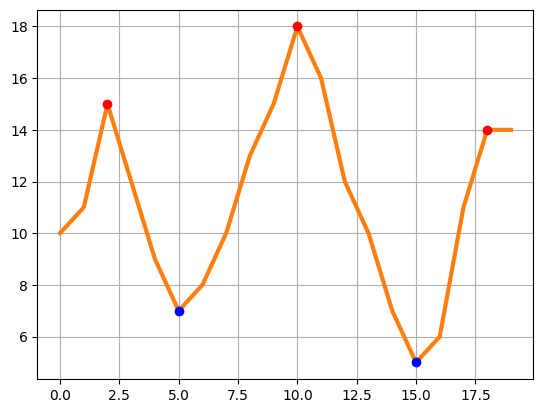

In [359]:
x = range(len(liste))
plt.plot(liste)
plot_data(x,liste)

In [360]:
jours = 7
data['heures']=[k.split(' ')[1].split(':')[0] for k in data.dates]
data['jours']=[k.split(' ')[0] for k in data.dates]

data.tail(24*jours)[['jours','heures','temp','variation']]

,jours,heures,temp,variation
2235,04/09/24,09,19.30,2.24
2236,04/09/24,10,21.70,2.40
2237,04/09/24,11,24.27,2.57
2238,04/09/24,12,26.04,1.77
2239,04/09/24,13,27.42,1.38
...,...,...,...,...
2398,11/09/24,04,18.41,-0.59
2399,11/09/24,05,18.21,-0.20
2400,11/09/24,06,17.60,-0.61
2401,11/09/24,07,17.68,0.08


In [361]:
_min = round(data.tail(24*jours).temp.min(),2)
_max = round(data.tail(24*jours).temp.max(),2)

In [362]:
_max - _min

18.72

## Main graph

(20.798194444444466, 15)

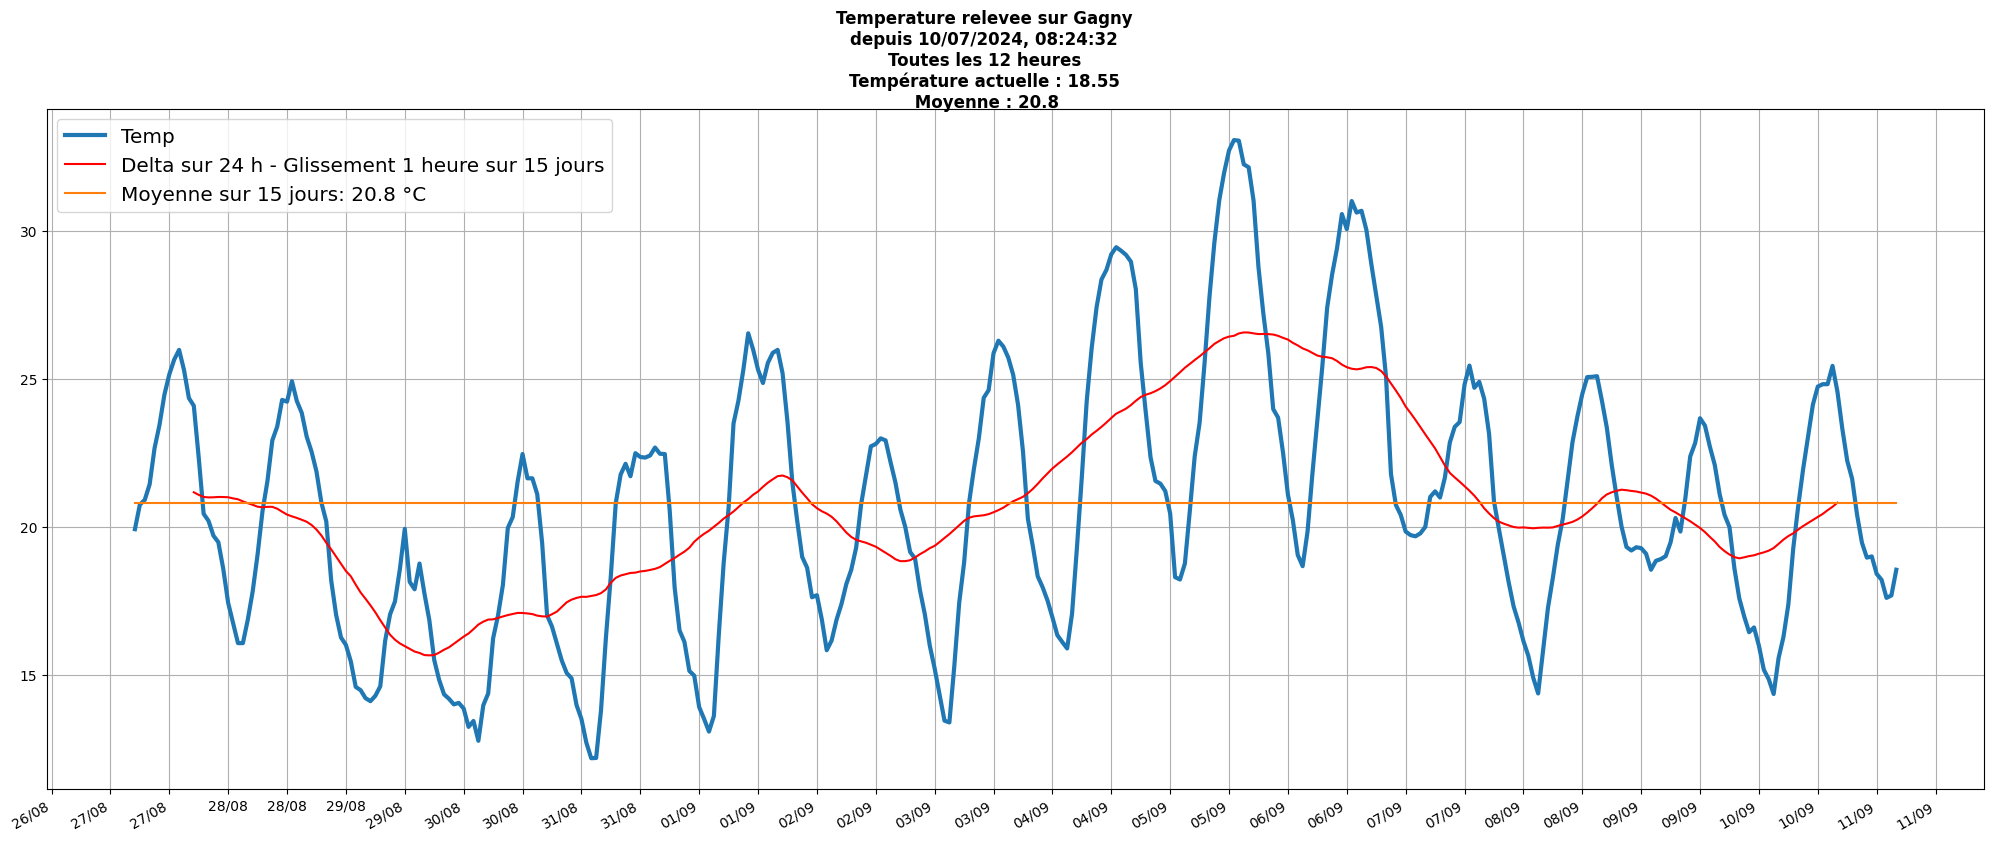

In [363]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
ax.set_xticklabels(hours,fontsize=10)
fig.suptitle(f"Temperature relevee sur Gagny\n\
depuis {window_start}\n\
Toutes les {interval} heures\nTempérature actuelle : {round(t.tail(1).values[0],2)}\n Moyenne : {round(moyenne,2)}", fontsize = 12, fontweight ='bold') 
#ax.xaxis.set_major_locator(mdates.DayLocator()) 
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(range(0, 24, interval))) #interval=6))
# plt.gcf().autofmt_xdate()
format_date(interval)
plt.plot(h,t,label='Temp',lw=3)
plt.plot(h[h_w:len(t)-h_w],mean_days,'r-',label=f'Delta sur {window} h - Glissement 1 heure sur {days} jours')
h1 = h.head(1)
h2 = h.tail(1)
moy = round(moyenne,2)
plt.plot((h1,h2),(moyenne, moyenne),label=f'Moyenne sur {days} jours: {moy} °C')
#plt.grid()
plt.legend(loc=2,fontsize='x-large')
#plt.title('Current temp : '+str(current.temp)+' °C')

moyenne,days

In [364]:
data.tail(5)[['heures','temp','variation']]

,heures,temp,variation
2398,04,18.41,-0.59
2399,05,18.21,-0.20
2400,06,17.60,-0.61
2401,07,17.68,0.08
2402,08,18.55,0.87


In [365]:
def area(df,dx=1):
    return (sum(df[:len(df)-1])+sum(df[1:len(df)]))*dx/2
df=[0,1]
area(df,1)

0.5

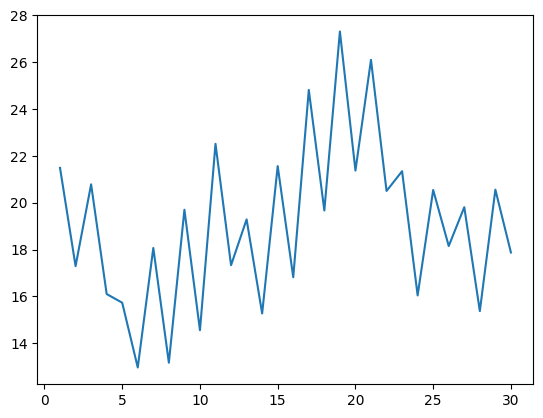

In [366]:
s = list(t)
# area under temperature
a=[]
for k in range(0,len(s),h_w):
    a.append(area(s[k:k+h_w])/h_w)
x = np.array(range(1,len(a)+1))
plt.plot(x,a)

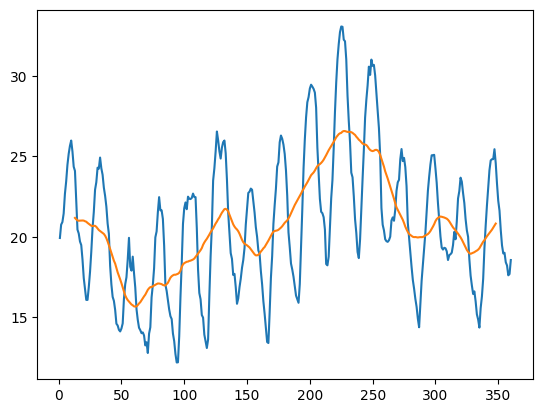

In [367]:
x = np.array(range(1,len(t)+1))
area(t)

plt.plot(x,t)
plt.plot(x[h_w:len(x)-h_w],mean_days)

(1.9500000000000002, [<matplotlib.lines.Line2D at 0x127e0d04f80>])

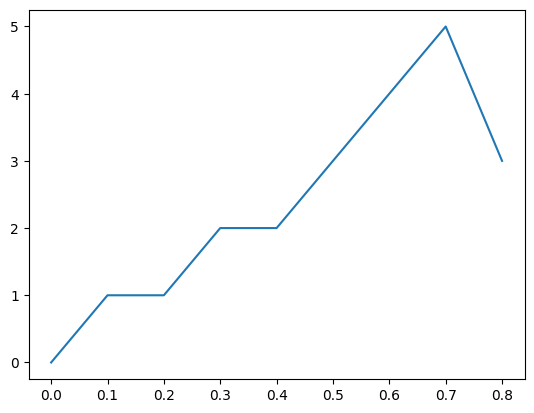

In [368]:
df = [0,1,1,2,2,3,4,5,3]
dx = .1
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)


(-0.35000000000000003, [<matplotlib.lines.Line2D at 0x127e0b81610>])

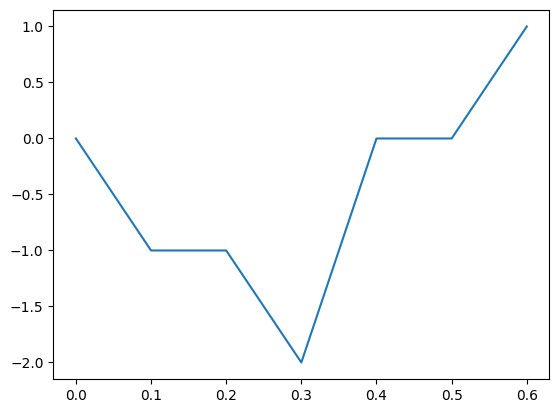

In [369]:
# valeurs négatives
dx = 0.1
df = [0,-1,-1,-2,0,0,1]
x = np.array(range(len(df)))
area(df,dx),plt.plot(x*dx,df)

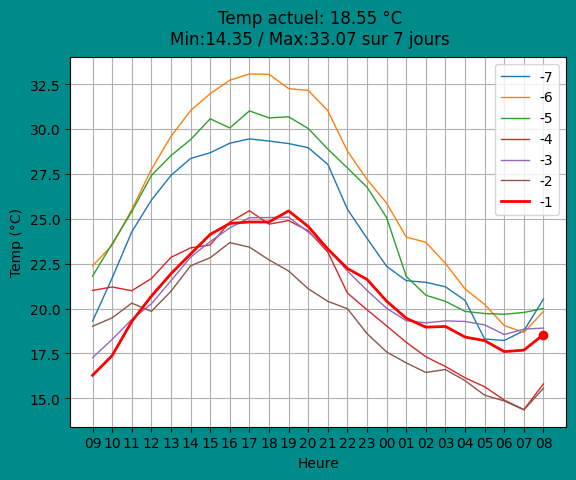

In [370]:
# courbes de température superposées des derniers 7 jours
fig, ax = plt.subplots(facecolor='darkcyan')
lw = 1
for t in range(jours,0,-1):
    #if t==1: lw=4
    if t==1:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw+1,label=-t,c='red')
        
    else:
        plt.plot(data.tail(24*t).heures.head(24),data.tail(24*t).temp.head(24),lw=lw,label=-t)
plt.plot(data.tail(1).heures,data.tail(1).temp,'ro')
fig.suptitle(f"Temp actuel: {round(data.tail(1).temp.values[0],2)} °C\nMin:{_min} / Max:{_max} sur {jours} jours")
plt.xlabel("Heure")
plt.ylabel("Temp (°C)")
plt.grid()
plt.legend()

In [371]:
max_, min_ = np.max(list(data.tail(24*t).temp.head(24))), np.min(list(data.tail(24*t).temp.head(24)))

In [372]:
max_,min_

(25.44, 16.28000000000003)

In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       2403 non-null   float64
 1   hours      2403 non-null   float64
 2   dates      2403 non-null   object 
 3   variation  2402 non-null   float64
 4   heures     2403 non-null   object 
 5   jours      2403 non-null   object 
dtypes: float64(3), object(3)
memory usage: 112.8+ KB


In [374]:
data

,temp,hours,dates,variation,heures,jours
0,13.19,19877.250000,03/06/24 06:00:00,NaN,06,03/06/24
1,12.20,19877.291667,03/06/24 07:00:00,-0.99,07,03/06/24
2,12.29,19877.333333,03/06/24 08:00:00,0.09,08,03/06/24
3,12.42,19877.375000,03/06/24 09:00:00,0.13,09,03/06/24
4,14.54,19877.416667,03/06/24 10:00:00,2.12,10,03/06/24
...,...,...,...,...,...,...
2398,18.41,19977.166667,11/09/24 04:00:00,-0.59,04,11/09/24
2399,18.21,19977.208333,11/09/24 05:00:00,-0.20,05,11/09/24
2400,17.60,19977.250000,11/09/24 06:00:00,-0.61,06,11/09/24
2401,17.68,19977.291667,11/09/24 07:00:00,0.08,07,11/09/24


In [375]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df

def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)


In [376]:
# save to csv    
csv_file = r"data_temp16122022.csv"
to_csv(csv_file, data)

In [377]:
# how to stop here

class StopExecution(Exception):
    def _render_traceback_(self):
        return []
#raise StopExecution

#raise
#assert(False)
#raise KeyboardInterrupt
#ext  # create an error

import this
#dir(list)
#dir(str)

# how to label on top of a bar plot

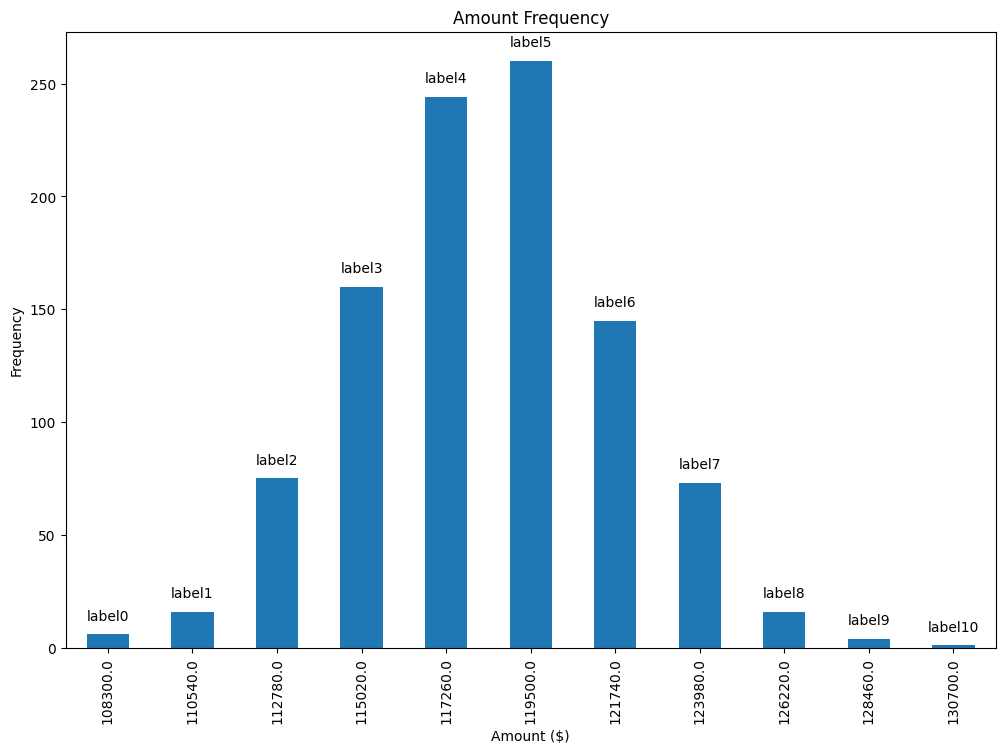

In [378]:
# Bring some raw data.
frequencies = [6, 16, 75, 160, 244, 260, 145, 73, 16, 4, 1]
# In my original code I create a series and run on that,
# so for consistency I create a series from the list.
freq_series = pd.Series(frequencies)

x_labels = [
    108300.0,
    110540.0,
    112780.0,
    115020.0,
    117260.0,
    119500.0,
    121740.0,
    123980.0,
    126220.0,
    128460.0,
    130700.0,
]

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind="bar")
ax.set_title("Amount Frequency")
ax.set_xlabel("Amount ($)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(x_labels)

rects = ax.patches

# Make some labels.
labels = [f"label{i}" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom"
    )

plt.show()

In [379]:
areas = []
moys = []
x = []
for t in range(jours,0,-1):
    x.append(-t)
    a = area(data.tail(24*t+1).temp.head(25))    # calcul sur 24h
    areas.append(round(a/24,2))
    moys.append(round(data.tail(24*t+1).temp.head(25).mean(),2))
    #print(-t,a)
#print(areas,x)
len(data.tail(24*t+1)),moys

(25, [23.97, 26.3, 25.18, 20.43, 20.88, 19.17, 20.73])

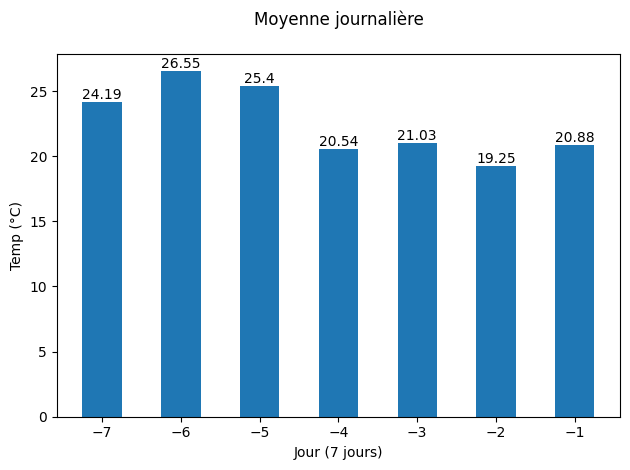

In [380]:
X_axis = np.arange(len(x))-7
fig, ax = plt.subplots()
plt.title("Moyenne journalière\n")
plt.xlabel("Jour (7 jours)")
plt.ylabel("Temp (°C)")
#plt.plot(x,areas,"r")
plt.bar(X_axis,areas,width=0.5)
fig.tight_layout()
# plt.bar(X_axis-0.3,areas,width=0.1)
# plt.bar(X_axis+0.3,moys,width=0.1)
rects = ax.patches

# Make some labels.
labels = [rects[i].get_height() for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    offset = sign(label)*0.1-0.1
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + offset, label, ha="center", va="bottom"
    )



In [381]:
labels

[24.19, 26.55, 25.4, 20.54, 21.03, 19.25, 20.88]

In [382]:
df = list(data.tail(24).temp.head(24))
df,area(df)

([16.28000000000003,
  17.379999999999995,
  19.28000000000003,
  20.69,
  21.94,
  23.04000000000002,
  24.129999999999995,
  24.74000000000001,
  24.82000000000005,
  24.82000000000005,
  25.44,
  24.57000000000005,
  23.31,
  22.23000000000001,
  21.620000000000005,
  20.410000000000025,
  19.46000000000004,
  18.96000000000004,
  19.0,
  18.410000000000025,
  18.21000000000004,
  17.600000000000023,
  17.680000000000007,
  18.55000000000001],
 485.1550000000004)

In [383]:
moy = []
for i in range(len(df)-1):
    moy.append((df[i]+df[i+1])/2)
sum(moy)

485.1550000000004

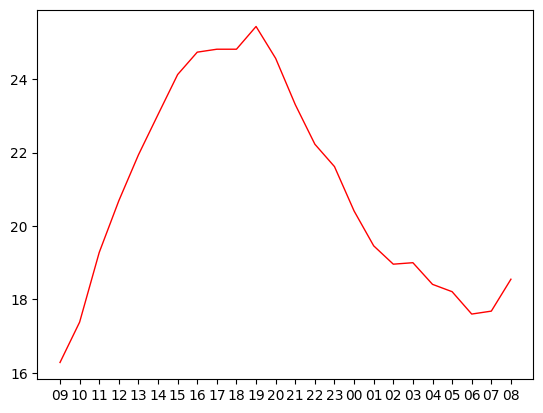

In [384]:
plt.plot(data.tail(24).heures.head(24),data.tail(24).temp.head(24),lw=lw,label=-t,c='red')

In [385]:
data.tail()


,temp,hours,dates,variation,heures,jours
2398,18.41,19977.166667,11/09/24 04:00:00,-0.59,04,11/09/24
2399,18.21,19977.208333,11/09/24 05:00:00,-0.20,05,11/09/24
2400,17.60,19977.250000,11/09/24 06:00:00,-0.61,06,11/09/24
2401,17.68,19977.291667,11/09/24 07:00:00,0.08,07,11/09/24
2402,18.55,19977.333333,11/09/24 08:00:00,0.87,08,11/09/24


In [386]:
chop = data.tail(24).temp
_max, _min = local_min_max(list(chop))
_max,_min,len(_max),len(_min)

([24.82000000000005, 25.44, 19.0],
 [16.28000000000003, 24.82000000000005, 18.96000000000004, 17.600000000000023],
 3,
 4)

In [387]:
_diff=[M-m for M,m in zip(_max, _min)]

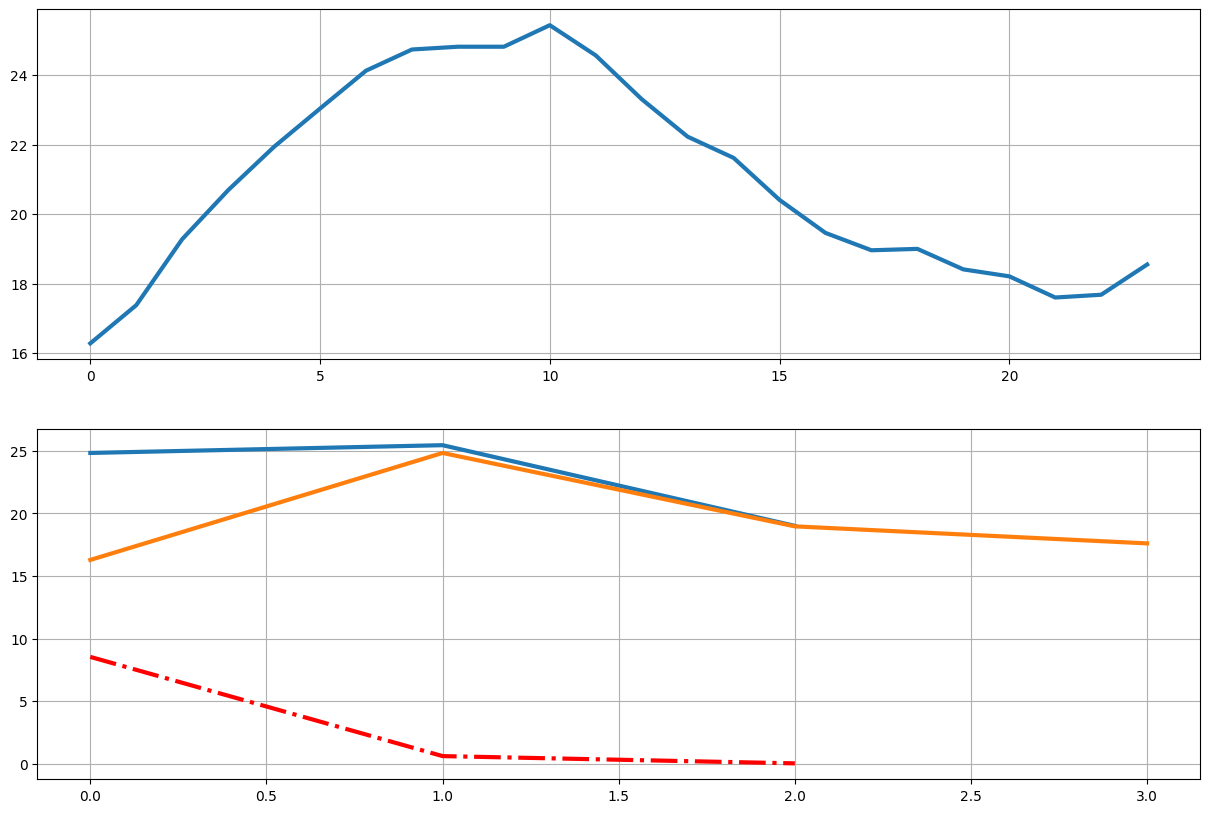

In [388]:
fig, (ax1,ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(15, 10)
ax1.plot(list(data.tail(24).temp),lw=3)
ax1.grid()
ax2.plot(_max,lw=3)
ax2.plot(_min,lw=3)
ax2.plot(_diff,'r-.',lw=3)
ax2.grid()

[] 0 [1] 1
[] 0 [1] 1


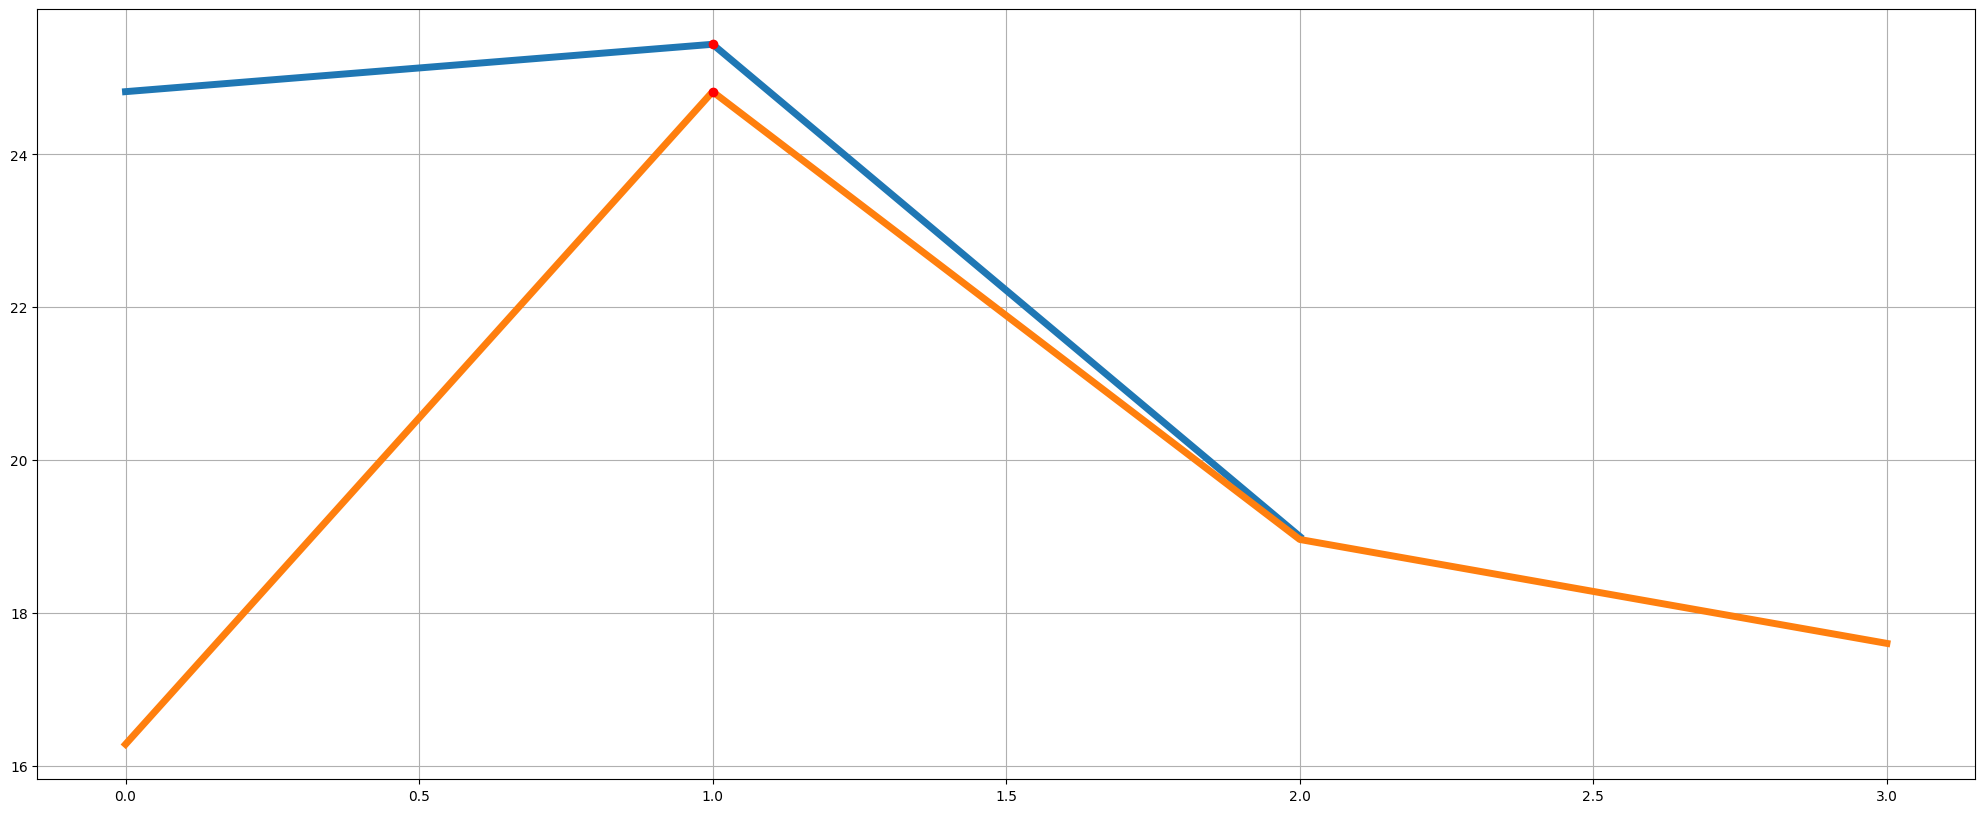

In [389]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x =  range(len(_max))
plot_data(x,_max,lw=5)
x =  range(len(_min))
plot_data(x,_min,lw=5)
plt.grid()

In [390]:
liste = [10, 11, 15, 12, 9, 7, 8, 10, 13, 15, 18, 16, 12, 10, 7, 5, 6, 11, 14, 14]
diff(liste)


array([ 1,  4, -3, -3, -2,  1,  2,  3,  2,  3, -2, -4, -2, -3, -2,  1,  5,
        3,  0])

In [391]:
sign(diff(liste))


array([ 1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1,
        1,  0])

In [392]:
diff(sign(diff(liste)))


array([ 0, -2,  0,  0,  2,  0,  0,  0,  0, -2,  0,  0,  0,  0,  2,  0,  0,
       -1])

In [393]:
diff(sign(diff(liste)))>0


array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False])

In [394]:
(diff(sign(diff(liste)))).nonzero()

(array([ 1,  4,  9, 14, 17], dtype=int64),)

[ 5 15] 2 [ 2 10 18] 3


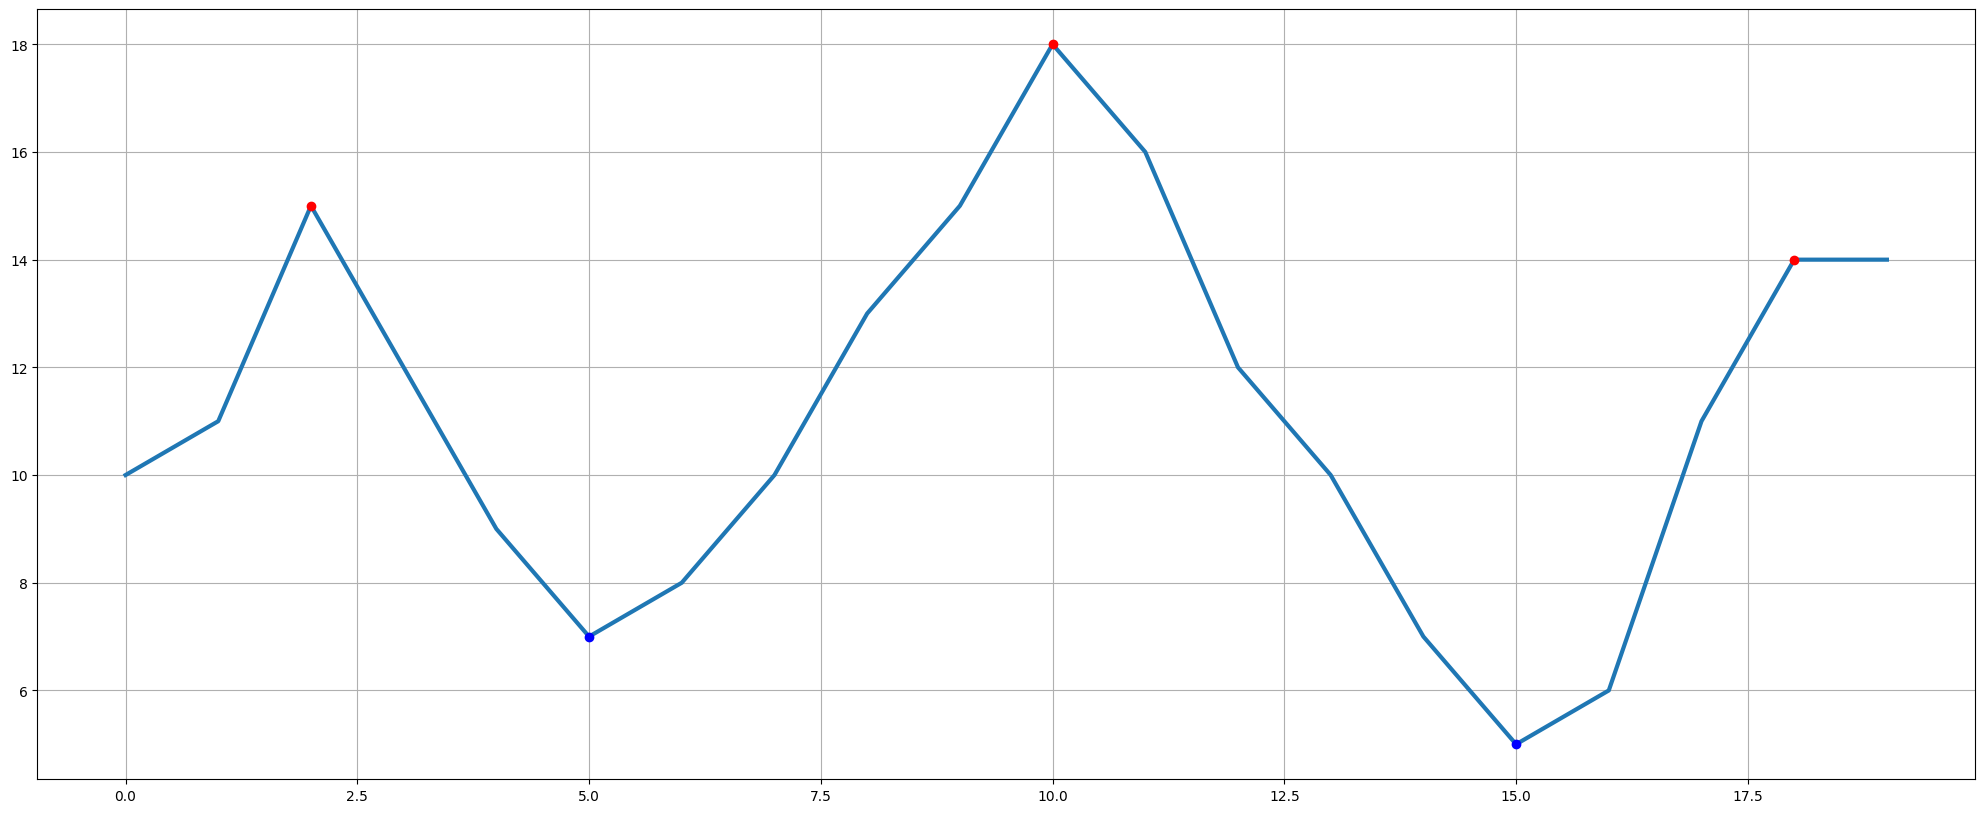

In [395]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(25, 10)
x = range(len(liste))
_data = liste
plot_data(x, _data)


In [396]:
date_time_str,days,interval

('03/06/24 06:00:00', 15, 12)

## last records

In [397]:
# 7 jours temp, mean
df = pd.DataFrame(data.tail(7*24)['temp'])
df['mean']= mean_days[-7*24:]
df

,temp,mean
2235,19.30,20.937083
2236,21.70,21.015000
2237,24.27,21.136250
2238,26.04,21.280833
2239,27.42,21.450833
...,...,...
2398,18.41,20.334583
2399,18.21,20.435833
2400,17.60,20.562500
2401,17.68,20.677083


<Axes: >

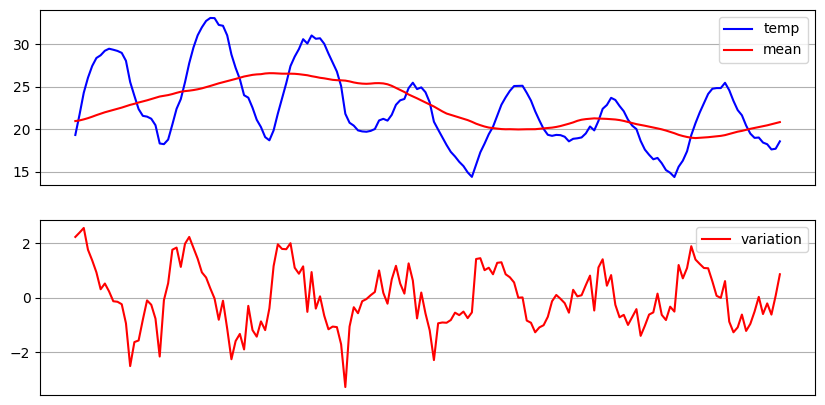

In [398]:
fig, axes = plt.subplots(nrows=2, ncols=1)

# plot temp, mean
df.plot(ax=axes[0],figsize=(10,5),color=['blue','red'],grid=True, legend=True,rot=45,xticks=[])
# 7 jours variation
data.tail(7*24)['variation'].plot(ax=axes[1],figsize=(10,5),color='red',grid=True, legend=True,rot=45,xticks=[])

In [399]:
data.tail(24*7)['temp'].max(),data.tail(24*7)['temp'].min()

(33.07000000000005, 14.350000000000025)

In [400]:
def high_low(n):
    # variation 24 heures il y a n jours
    #n = 0
    l = len(data)
    e = n*24
    s = e+24

    high = round(data[l-s:l-e]['temp'].max(),2)
    low = round(data[l-s:l-e]['temp'].min(),2)
    delta = round(high - low,2)
    return high,low,delta

In [401]:
# max, min, delta sur n jours
n = 30
high_n = []
low_n = []
moy_n =  []
delta_n = []
for k in range(n):
    h,l,d = high_low(n-1-k)
    high_n.append(h)
    low_n.append(l)
    moy_n.append((h+l)/2)
    delta_n.append(d)
    print('J',-(n-1-k),h,l,d)


J -29 29.72 18.22 11.5
J -28 30.45 19.93 10.52
J -27 30.2 15.04 15.16
J -26 23.48 13.55 9.93
J -25 23.17 15.01 8.16
J -24 23.6 14.95 8.65
J -23 20.41 14.94 5.47
J -22 20.88 12.44 8.44
J -21 20.48 14.07 6.41
J -20 22.23 12.8 9.43
J -19 26.06 15.41 10.65
J -18 21.44 10.12 11.32
J -17 21.74 12.05 9.69
J -16 24.38 16.54 7.84
J -15 26.35 18.8 7.55
J -14 25.98 16.07 9.91
J -13 24.92 14.21 10.71
J -12 19.93 12.77 7.16
J -11 22.46 12.18 10.28
J -10 22.68 13.08 9.6
J -9 26.54 15.83 10.71
J -8 22.99 13.39 9.6
J -7 26.29 15.89 10.4
J -6 29.45 18.22 11.23
J -5 33.07 18.67 14.4
J -4 31.01 19.68 11.33
J -3 25.45 14.37 11.08
J -2 25.09 17.26 7.83
J -1 23.67 14.35 9.32
J 0 25.44 16.28 9.16


<Axes: >

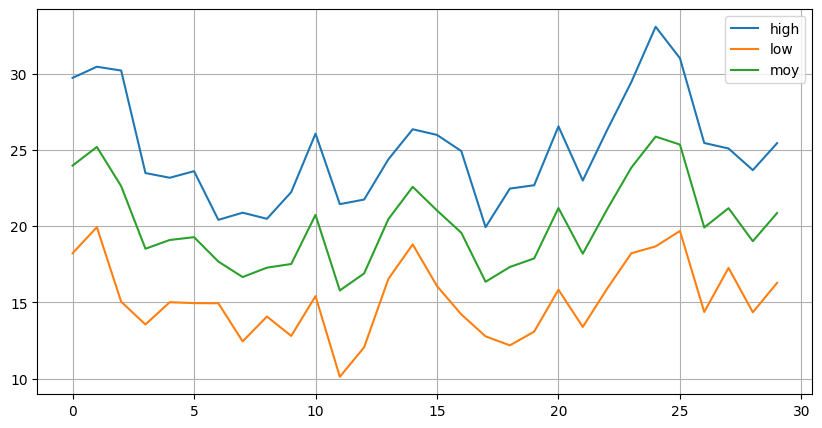

In [402]:
# pandas plot
df1 = pd.DataFrame()
df1['high'] = high_n
df1['low'] = low_n
df1['moy'] = moy_n
df1['delta'] = delta_n
df1[['high','low','moy']].plot(figsize=(10,5),grid=True, legend=True)

In [403]:
_data = list(df1['high'])
_max, _min = local_min_max(_data)
_max


[30.45, 23.6, 20.88, 26.06, 26.35, 26.54, 33.07]

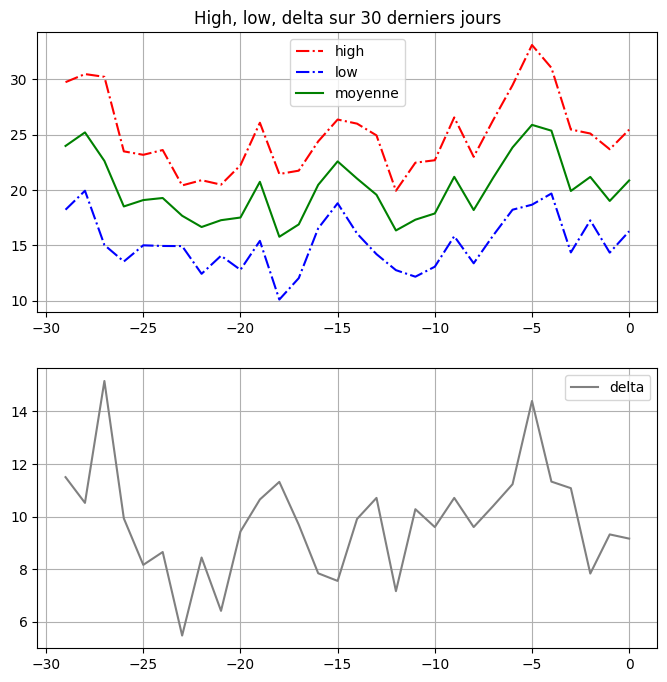

In [404]:
# plot lists
x = range(-29,1,1)
fig, (ax1, ax2) = plt.subplots(2,1)
# the size of A4 paper
fig.set_size_inches(8, 8)
ax1.set_title('High, low, delta sur '+str(n)+' derniers jours')
ax1.plot(x,high_n, '-.',color='red',label='high')
ax1.plot(x,low_n, '-.', color='blue',label = 'low')
ax1.plot(x,moy_n, color='green',label = 'moyenne')
ax1.grid()
ax1.legend()
#moy_n = [(h+l)/2 for h,l in zip(high_n,low_n)]

ax2.plot(x,delta_n,color='grey',label='delta')
ax2.grid()
ax2.legend()

In [405]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       2403 non-null   float64
 1   hours      2403 non-null   float64
 2   dates      2403 non-null   object 
 3   variation  2402 non-null   float64
 4   heures     2403 non-null   object 
 5   jours      2403 non-null   object 
dtypes: float64(3), object(3)
memory usage: 112.8+ KB


In [406]:
data_24 = data.tail(25)[['hours','dates','variation']]
#len(data_24),data_24


In [407]:
# plot X_axis
date_24 = np.array(data.tail(25)['hours'])
#date_24

In [408]:
# inutile ! il faut utiliser le champ data.hours
def mk_date2(data):
    str1, str2 = data_24.head(1)['dates'].values[0] , data_24.tail(1)['dates'].values[0] 
    print(str1,str2)
    return mdates.drange(datetime.strptime(str1, '%d/%m/%y %H:%M:%S'),datetime.strptime(str2, '%d/%m/%y %H:%M:%S'),dt.timedelta(hours=1))
#date_24 = mk_date2(data_24)

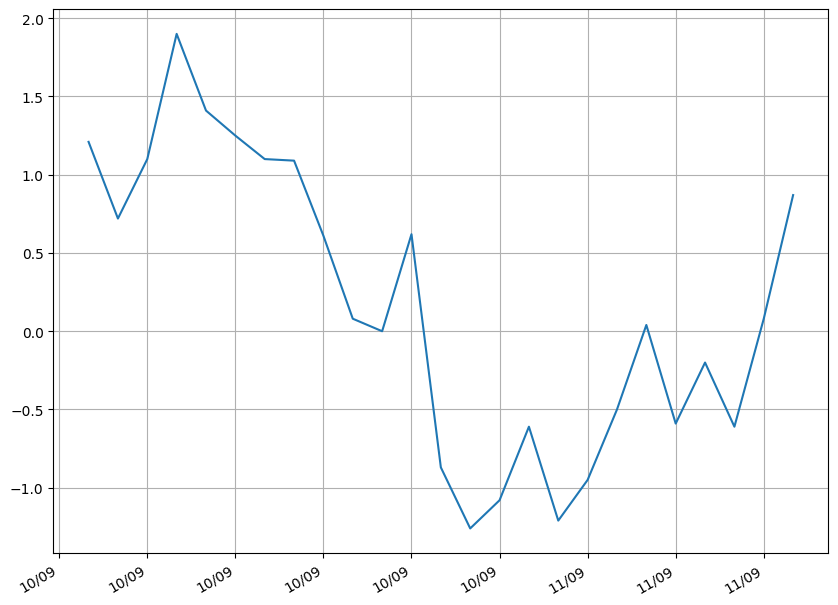

In [409]:
l = len(date_24)
data.tail(l)[['temp','variation']]
var = data.tail(l)[['variation']].values

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
plt.plot(date_24,var)
format_date()
#plt.grid()

In [410]:
w = int(24*days)
days,data.tail(w)['temp'].max(), data.tail(w)['temp'].min()


(15, 33.07000000000005, 12.180000000000009)

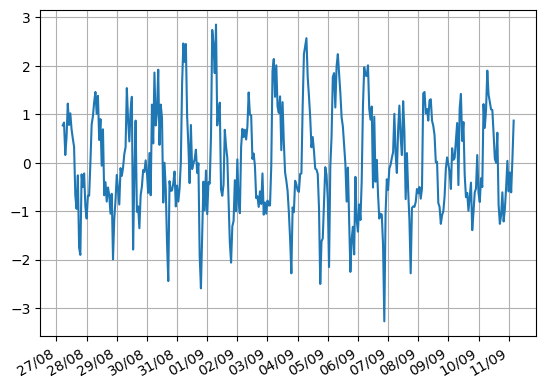

In [411]:
#data['variation'].tail(w).plot()
plt.plot(data['hours'].tail(w),data['variation'].tail(w))
format_date(24)

### date pour les temp max, min

In [412]:
d_max = data.tail(w)['temp'].max()
d_max, data[data['temp']==data.tail(w)['temp'].max()]['dates']

(33.07000000000005,
 2267    05/09/24 17:00:00
 Name: dates, dtype: object)

In [413]:
d_min = data.tail(w)['temp'].min()
d_min, data[data['temp']==data.tail(w)['temp'].min()]['dates']

(12.180000000000009,
 354     18/06/24 00:00:00
 2136    31/08/24 06:00:00
 Name: dates, dtype: object)

In [414]:
data.tail(w)['temp'].describe()

count    360.000000
mean      20.798194
std        4.452302
min       12.180000
25%       17.467500
50%       20.490000
75%       23.675000
max       33.070000
Name: temp, dtype: float64

In [415]:
from  datetime import datetime
#matplotlib.dates.date2num(hours)
#then.isoformat(),round(temp[-1],2)
today = datetime.now()
today.strftime('%d/%m/%y %H:%M:%S'),round(temp[-1],2)


('25/07/24 08:24:49', 18.55)

In [416]:
# current date and time
ts = datetime.timestamp(today)
ts

1721888689.104964